# ANN Project: Used Car Price Prediction
#### Abdi Kusata, Beste Kuruefe, John Iwenofu, Will Landers
This project is for our Artificial Neural Networks and Deep Learning A course at DIS Copenhagen. We use this dataset for the project: https://www.kaggle.com/datasets/taeefnajib/used-car-price-prediction-dataset 

In [27]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Prepping the dataset for training the model

#### Step 1: Cleaning milage, price, and dropping some rows

In [28]:
# Load the dataset
used_cars = pd.read_csv('used_cars.csv')

used_cars = used_cars.drop(columns=['int_col', 'clean_title'])

print("Before dropping rows with NaN values:")
print(used_cars.shape[0])

used_cars = used_cars.dropna()

print("After dropping rows with NaN values:")
print(used_cars.shape[0])

used_cars['price'] = used_cars['price'].str.replace('$', '').str.replace(',', '').astype(int)
used_cars['milage'] = used_cars['milage'].str.replace('mi.', '').str.replace(',', '').astype(int)

used_cars_orginal = used_cars.copy()

used_cars.head(10)


Before dropping rows with NaN values:
4009
After dropping rows with NaN values:
3730


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,accident,price
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,At least 1 accident or damage reported,10300
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,At least 1 accident or damage reported,38005
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,None reported,54598
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,None reported,15500
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,None reported,34999
5,Acura,ILX 2.4L,2016,136397,Gasoline,2.4 Liter,F,Silver,None reported,14798
6,Audi,S3 2.0T Premium Plus,2017,84000,Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,None reported,31000
7,BMW,740 iL,2001,242000,Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,Green,None reported,7300
8,Lexus,RC 350 F Sport,2021,23436,Gasoline,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,Black,None reported,41927
10,Land,Rover Range Rover Sport 3.0 Supercharged HST,2021,27608,Gasoline,V6,Automatic,Fuji White,None reported,73897


#### Step 2: Cleaning the Accident Column 

In [29]:
# print(used_cars['accident'].unique())

def clean_accident(text):
    if pd.isna(text):
        return None
    elif "None reported" in text:
        return 0
    else:
        return 1
    
used_cars["accident_reported"] = used_cars["accident"].apply(clean_accident)
used_cars = used_cars.dropna(subset=["accident_reported"])

# print(used_cars['accident_reported'].value_counts(dropna=False))

print(used_cars.head(10))

       brand                                         model  model_year  \
0       Ford               Utility Police Interceptor Base        2013   
1    Hyundai                                  Palisade SEL        2021   
2      Lexus                                 RX 350 RX 350        2022   
3   INFINITI                              Q50 Hybrid Sport        2015   
4       Audi                     Q3 45 S line Premium Plus        2021   
5      Acura                                      ILX 2.4L        2016   
6       Audi                          S3 2.0T Premium Plus        2017   
7        BMW                                        740 iL        2001   
8      Lexus                                RC 350 F Sport        2021   
10      Land  Rover Range Rover Sport 3.0 Supercharged HST        2021   

    milage      fuel_type                                             engine  \
0    51000  E85 Flex Fuel  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...   
1    34742       Gasoline

#### Step 3: Cleaning & One-Hot Encoding Transmission

In [30]:
def clean_transmission(text):
    if pd.isna(text):
        return None
    text = text.lower()
    if 'automatic' in text or 'a/t' in text:
        return "automatic"
    elif 'manual' in text or 'm/t' in text:
        return "manual"
    elif 'dual' in text or 'shift' in text or 'dsg' in text:
        return "dual_shift"
    elif 'cvt' in text:
        return "cvt"
    elif 'semi-automatic' in text or 'semi automatic' in text:
        return "semi_automatic"
    else:
        return "unknown"

# Apply the function to clean the transmission column
used_cars["transmission"] = used_cars["transmission"].apply(clean_transmission)

# Drop rows with NaN values in the 'transmission' column
used_cars = used_cars.dropna(subset=["transmission"])

# One-hot encode the cleaned 'transmission' column
used_cars = pd.get_dummies(used_cars, columns=["transmission"], prefix="trans")
# Convert boolean columns to integers (0/1)
used_cars.loc[:, used_cars.columns.str.startswith("trans_")] = \
    used_cars.loc[:, used_cars.columns.str.startswith("trans_")].astype(int)

used_cars.head(10)

/var/folders/gr/28yk7w6116xf5n5pv51ys9600000gn/T/ipykernel_23616/1973666572.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 1 1 ... 0 1 1]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  used_cars.loc[:, used_cars.columns.str.startswith("trans_")] = \
/var/folders/gr/28yk7w6116xf5n5pv51ys9600000gn/T/ipykernel_23616/1973666572.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  used_cars.loc[:, used_cars.columns.str.startswith("trans_")] = \
/var/folders/gr/28yk7w6116xf5n5pv51ys9600000gn/T/ipykernel_23616/1973666572.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 1 0 0]' has dtype incompatible with bool, 

,brand,model,model_year,milage,fuel_type,engine,ext_col,accident,price,accident_reported,trans_automatic,trans_cvt,trans_dual_shift,trans_manual,trans_unknown
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,Black,At least 1 accident or damage reported,10300,1,1,0,0,0,0
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,Moonlight Cloud,At least 1 accident or damage reported,38005,1,1,0,0,0,0
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Blue,None reported,54598,0,1,0,0,0,0
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,Black,None reported,15500,0,1,0,0,0,0
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,Glacier White Metallic,None reported,34999,0,1,0,0,0,0
5,Acura,ILX 2.4L,2016,136397,Gasoline,2.4 Liter,Silver,None reported,14798,0,0,0,0,0,1
6,Audi,S3 2.0T Premium Plus,2017,84000,Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,Blue,None reported,31000,0,1,0,0,0,0
7,BMW,740 iL,2001,242000,Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,Green,None reported,7300,0,1,0,0,0,0
8,Lexus,RC 350 F Sport,2021,23436,Gasoline,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,Black,None reported,41927,0,1,0,0,0,0
10,Land,Rover Range Rover Sport 3.0 Supercharged HST,2021,27608,Gasoline,V6,Fuji White,None reported,73897,0,1,0,0,0,0


#### Step 4: Cleaning and One-Hot Encoding Brand

In [31]:
# One-hot encode the 'brand' column
used_cars = pd.get_dummies(used_cars, columns=['brand'], prefix='brand')

# Convert any boolean columns created to integers (0/1)
brand_cols = used_cars.columns[used_cars.columns.str.startswith('brand_')]
used_cars[brand_cols] = used_cars[brand_cols].astype(int)

used_cars.head(10)

,model,model_year,milage,fuel_type,engine,ext_col,accident,price,accident_reported,trans_automatic,...,brand_Rolls-Royce,brand_Saab,brand_Saturn,brand_Scion,brand_Subaru,brand_Suzuki,brand_Toyota,brand_Volkswagen,brand_Volvo,brand_smart
0,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,Black,At least 1 accident or damage reported,10300,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,Moonlight Cloud,At least 1 accident or damage reported,38005,1,1,...,0,0,0,0,0,0,0,0,0,0
2,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Blue,None reported,54598,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,Black,None reported,15500,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,Glacier White Metallic,None reported,34999,0,1,...,0,0,0,0,0,0,0,0,0,0
5,ILX 2.4L,2016,136397,Gasoline,2.4 Liter,Silver,None reported,14798,0,0,...,0,0,0,0,0,0,0,0,0,0
6,S3 2.0T Premium Plus,2017,84000,Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,Blue,None reported,31000,0,1,...,0,0,0,0,0,0,0,0,0,0
7,740 iL,2001,242000,Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,Green,None reported,7300,0,1,...,0,0,0,0,0,0,0,0,0,0
8,RC 350 F Sport,2021,23436,Gasoline,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,Black,None reported,41927,0,1,...,0,0,0,0,0,0,0,0,0,0
10,Rover Range Rover Sport 3.0 Supercharged HST,2021,27608,Gasoline,V6,Fuji White,None reported,73897,0,1,...,0,0,0,0,0,0,0,0,0,0


#### Step 5: Cleaning and One-Hot Encoding ext_col

In [32]:
# Clean and simplify the color column
def simplify_color(color):
    color = str(color).lower()

    if any(x in color for x in ['white', 'chalk', 'pearl', 'bianco']):
        return 'White'
    elif any(x in color for x in ['black', 'nero', 'ebony', 'obsidian']):
        return 'Black'
    elif any(x in color for x in ['blue', 'blu', 'stormy']):
        return 'Blue'
    elif any(x in color for x in ['gray', 'grey', 'graphite', 'slate', 'granite', 'quartzite']):
        return 'Gray'
    elif any(x in color for x in ['red', 'rosso', 'ruby', 'scarlet']):
        return 'Red'
    elif any(x in color for x in ['silver', 'iridium', 'tungsten']):
        return 'Silver'
    elif any(x in color for x in ['green', 'moss', 'verde']):
        return 'Green'
    elif any(x in color for x in ['brown', 'bronze', 'dune']):
        return 'Brown'
    elif any(x in color for x in ['orange', 'mango', 'arancio']):
        return 'Orange'
    elif any(x in color for x in ['yellow', 'hellayella']):
        return 'Yellow'
    elif any(x in color for x in ['purple', 'plum', 'ametrin']):
        return 'Purple'
    elif any(x in color for x in ['beige', 'tan', 'sandstone']):
        return 'Beige'
    elif any(x in color for x in ['gold']):
        return 'Gold'
    else:
        return 'Non-Standard Color'

# Apply function
used_cars['ext_color_simple'] = used_cars['ext_col'].apply(simplify_color)
used_cars = used_cars.dropna(subset=["ext_color_simple"])

# One-hot encode ext_color_simple
used_cars = pd.get_dummies(used_cars, columns=['ext_color_simple'], prefix='color')

# Convert boolean columns to int
color_cols = used_cars.columns[used_cars.columns.str.startswith('color_')]
used_cars[color_cols] = used_cars[color_cols].astype(int)

used_cars = used_cars.drop(columns=['ext_col'])

used_cars.head(10)

,model,model_year,milage,fuel_type,engine,accident,price,accident_reported,trans_automatic,trans_cvt,...,color_Gold,color_Gray,color_Green,color_Non-Standard Color,color_Orange,color_Purple,color_Red,color_Silver,color_White,color_Yellow
0,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,At least 1 accident or damage reported,10300,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,At least 1 accident or damage reported,38005,1,1,0,...,0,0,0,1,0,0,0,0,0,0
2,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,None reported,54598,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,None reported,15500,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,None reported,34999,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5,ILX 2.4L,2016,136397,Gasoline,2.4 Liter,None reported,14798,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,S3 2.0T Premium Plus,2017,84000,Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,None reported,31000,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,740 iL,2001,242000,Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,None reported,7300,0,1,0,...,0,0,1,0,0,0,0,0,0,0
8,RC 350 F Sport,2021,23436,Gasoline,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,None reported,41927,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10,Rover Range Rover Sport 3.0 Supercharged HST,2021,27608,Gasoline,V6,None reported,73897,0,1,0,...,0,0,0,0,0,0,0,0,1,0


#### Step 6: Cleaning and One Hot Encoding Fuel Type

In [33]:
print(used_cars['fuel_type'].value_counts(dropna=False))

def clean_fuel(value):
    value = value.lower()
    if 'gasoline' in value:
        return "gasoline"
    elif 'diesel' in value:
        return "diesel"
    elif 'hybrid' in value:
        return "hybrid"
    elif 'e85 flex fuel' in value:
        return "e85 flex fuel"
    else:
        return "unknown"

used_cars['fuel_type'] = used_cars['fuel_type'].apply(clean_fuel)

used_cars = pd.get_dummies(used_cars, columns=['fuel_type'], prefix='fuel')
used_cars[used_cars.columns[used_cars.columns.str.startswith("fuel_")]] = \
    used_cars[used_cars.columns[used_cars.columns.str.startswith("fuel_")]].astype(int)

used_cars.head(10)

fuel_type
Gasoline          3218
Hybrid             190
E85 Flex Fuel      133
Diesel             110
–                   44
Plug-In Hybrid      33
not supported        2
Name: count, dtype: int64


,model,model_year,milage,engine,accident,price,accident_reported,trans_automatic,trans_cvt,trans_dual_shift,...,color_Purple,color_Red,color_Silver,color_White,color_Yellow,fuel_diesel,fuel_e85 flex fuel,fuel_gasoline,fuel_hybrid,fuel_unknown
0,Utility Police Interceptor Base,2013,51000,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,At least 1 accident or damage reported,10300,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,Palisade SEL,2021,34742,3.8L V6 24V GDI DOHC,At least 1 accident or damage reported,38005,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,RX 350 RX 350,2022,22372,3.5 Liter DOHC,None reported,54598,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Q50 Hybrid Sport,2015,88900,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,None reported,15500,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Q3 45 S line Premium Plus,2021,9835,2.0L I4 16V GDI DOHC Turbo,None reported,34999,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
5,ILX 2.4L,2016,136397,2.4 Liter,None reported,14798,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
6,S3 2.0T Premium Plus,2017,84000,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,None reported,31000,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7,740 iL,2001,242000,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,None reported,7300,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8,RC 350 F Sport,2021,23436,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,None reported,41927,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
10,Rover Range Rover Sport 3.0 Supercharged HST,2021,27608,V6,None reported,73897,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


#### Step 7: Feature Extraction from 'engine' Column

##### Key for Feature Extraction from 'engine' Column
- horsepower     → Extracted from patterns like '300.0HP'
- engine_size    → Extracted from patterns like '3.7L' or '3.5 Liter'
- cylinder_type  → Extracted from patterns like 'V6' or '4 Cylinder'

In [34]:
import re

# Extract horsepower (e.g., '300.0HP')
used_cars['horsepower'] = used_cars['engine'].apply(lambda x: re.findall(r'(\d+(\.\d+)?)HP', str(x)))
used_cars['horsepower'] = used_cars['horsepower'].apply(lambda x: x[0][0] if x else None)

# Extract engine size (e.g., '3.7L', '2.0L')
used_cars['engine_size'] = used_cars['engine'].apply(lambda x: re.findall(r'(\d+(\.\d+)?)L|(\d+(\.\d+)?) Liter', str(x)))
used_cars['engine_size'] = used_cars['engine_size'].apply(lambda x: x[0][0] if x else None)

# Extract cylinder type (e.g., 'V6', '4 Cylinder')
used_cars['cylinder_type'] = used_cars['engine'].apply(lambda x: re.findall(r'V\d|(\d+ Cylinder)', str(x)))
used_cars['cylinder_type'] = used_cars['cylinder_type'].apply(lambda x: x[0] if x else None)

# Count missing (None or NaN) values in the new columns
missing_horsepower = used_cars['horsepower'].isna().sum()
missing_engine_size = used_cars['engine_size'].isna().sum()
missing_cylinder_type = used_cars['cylinder_type'].isna().sum()

print("Missing values:")
print(f"Horsepower: {missing_horsepower}")
print(f"Engine Size: {missing_engine_size}")
print(f"Cylinder Type: {missing_cylinder_type}")

# Check how many rows have BOTH horsepower and engine_size missing
both_missing = used_cars[used_cars['horsepower'].isna() & used_cars['engine_size'].isna()]
print(f"Rows with BOTH horsepower and engine_size missing: {both_missing.shape[0]}")

missing_any = used_cars[['horsepower', 'engine_size', 'cylinder_type']].isnull().any(axis=1)
print("Rows with at least one missing engine-related value:", missing_any.sum())


used_cars = used_cars[~(
    used_cars['horsepower'].isnull() &
    used_cars['engine_size'].isnull() &
    used_cars['cylinder_type'].isnull()
)]

missing_count = used_cars[['horsepower', 'engine_size', 'cylinder_type']].isnull().sum(axis=1)

print("Exactly 1 missing:", (missing_count == 1).sum())
print("Exactly 2 missing:", (missing_count == 2).sum())
print("All 3 missing:", (missing_count == 3).sum())

used_cars_final = used_cars.copy()

used_cars.head(10) 

Missing values:
Horsepower: 746
Engine Size: 55
Cylinder Type: 441
Rows with BOTH horsepower and engine_size missing: 53
Rows with at least one missing engine-related value: 753
Exactly 1 missing: 313
Exactly 2 missing: 391
All 3 missing: 0


,model,model_year,milage,engine,accident,price,accident_reported,trans_automatic,trans_cvt,trans_dual_shift,...,color_White,color_Yellow,fuel_diesel,fuel_e85 flex fuel,fuel_gasoline,fuel_hybrid,fuel_unknown,horsepower,engine_size,cylinder_type
0,Utility Police Interceptor Base,2013,51000,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,At least 1 accident or damage reported,10300,1,1,0,0,...,0,0,0,1,0,0,0,300.0,3.7,
1,Palisade SEL,2021,34742,3.8L V6 24V GDI DOHC,At least 1 accident or damage reported,38005,1,1,0,0,...,0,0,0,0,1,0,0,None,3.8,
2,RX 350 RX 350,2022,22372,3.5 Liter DOHC,None reported,54598,0,1,0,0,...,0,0,0,0,1,0,0,None,,None
3,Q50 Hybrid Sport,2015,88900,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,None reported,15500,0,1,0,0,...,0,0,0,0,0,1,0,354.0,3.5,
4,Q3 45 S line Premium Plus,2021,9835,2.0L I4 16V GDI DOHC Turbo,None reported,34999,0,1,0,0,...,1,0,0,0,1,0,0,None,2.0,None
5,ILX 2.4L,2016,136397,2.4 Liter,None reported,14798,0,0,0,0,...,0,0,0,0,1,0,0,None,,None
6,S3 2.0T Premium Plus,2017,84000,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,None reported,31000,0,1,0,0,...,0,0,0,0,1,0,0,292.0,2.0,4 Cylinder
7,740 iL,2001,242000,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,None reported,7300,0,1,0,0,...,0,0,0,0,1,0,0,282.0,4.4,8 Cylinder
8,RC 350 F Sport,2021,23436,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,None reported,41927,0,1,0,0,...,0,0,0,0,1,0,0,311.0,3.5,
10,Rover Range Rover Sport 3.0 Supercharged HST,2021,27608,V6,None reported,73897,0,1,0,0,...,1,0,0,0,1,0,0,None,None,


#### Step 8: Dropping the Outliers

In [35]:
# Count cars priced $150,000 or higher (outliers)
outliers = used_cars[used_cars['price'] >= 150000]
print(f"Number of outliers (>= $150,000): {outliers.shape[0]}")

# % of the total this is
total_cars = used_cars.shape[0]
percentage_outliers = (outliers.shape[0] / total_cars) * 100
print(f"Percentage of outliers: {percentage_outliers:.2f}%")

Number of outliers (>= $150,000): 112
Percentage of outliers: 3.04%


In [36]:
# Keep only cars priced below $150,000
used_cars = used_cars[used_cars['price'] < 150000]

print(f"New dataset size after dropping outliers: {used_cars.shape[0]} cars")

New dataset size after dropping outliers: 3569 cars


In [37]:
# Displaying all columns
print(used_cars.columns.tolist())

['model', 'model_year', 'milage', 'engine', 'accident', 'price', 'accident_reported', 'trans_automatic', 'trans_cvt', 'trans_dual_shift', 'trans_manual', 'trans_unknown', 'brand_Acura', 'brand_Alfa', 'brand_Aston', 'brand_Audi', 'brand_BMW', 'brand_Bentley', 'brand_Bugatti', 'brand_Buick', 'brand_Cadillac', 'brand_Chevrolet', 'brand_Chrysler', 'brand_Dodge', 'brand_FIAT', 'brand_Ferrari', 'brand_Ford', 'brand_GMC', 'brand_Genesis', 'brand_Honda', 'brand_Hummer', 'brand_Hyundai', 'brand_INFINITI', 'brand_Jaguar', 'brand_Jeep', 'brand_Kia', 'brand_Lamborghini', 'brand_Land', 'brand_Lexus', 'brand_Lincoln', 'brand_Lotus', 'brand_MINI', 'brand_Maserati', 'brand_Maybach', 'brand_Mazda', 'brand_McLaren', 'brand_Mercedes-Benz', 'brand_Mercury', 'brand_Mitsubishi', 'brand_Nissan', 'brand_Plymouth', 'brand_Pontiac', 'brand_Porsche', 'brand_RAM', 'brand_Rolls-Royce', 'brand_Saab', 'brand_Saturn', 'brand_Scion', 'brand_Subaru', 'brand_Suzuki', 'brand_Toyota', 'brand_Volkswagen', 'brand_Volvo', 'b

## Training and Testing Dataset

In [38]:
# Columns to drop (We decided to drop horsepower, engine size, and cylinder type as well)
drop_columns = ['model', 'engine', 'accident', 'horsepower', 'engine_size', 'cylinder_type', 'price'] 

# X will be inputs, y will be target
X = used_cars.drop(columns=drop_columns)
y = used_cars['price']

# Normalize model_year and milage
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X[['model_year', 'milage']] = scaler.fit_transform(X[['model_year', 'milage']])

print(X.shape, y.shape)
used_cars['price'].describe()

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Poisson Regressor as our baseline model

In [ ]:
from sklearn.linear_model import PoissonRegressor
import numpy as np

# Initialize the Poisson Regressor
poisson_model = PoissonRegressor(alpha=1e-12, max_iter=1000)

# Train the model
poisson_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_poisson = poisson_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_poisson)
mse = mean_squared_error(y_test, y_pred_poisson)
mape = np.mean(np.abs((y_test - y_pred_poisson) / y_test)) * 100  # Mean Absolute Percentage Error

print(f"Poisson Regression MAE in dollars: {mae}")
print(f"Poisson Regression MSE: {mse}")
print(f"Poisson Regression MAPE: {mape}%")

Poisson Regression MAE in dollars: 9959.453247479345
Poisson Regression MSE: 209756232.82481515
Poisson Regression MAPE: 36.79803717403589%


### Trial 1 ANN

In [ ]:
# Build the feedforward neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression (no activation or linear)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='mae',    
    metrics=['mae']  
)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[callback])



/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 36410.5547 - mae: 36410.5547 - val_loss: 36266.3203 - val_mae: 36266.3203
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 36423.4492 - mae: 36423.4492 - val_loss: 36145.3672 - val_mae: 36145.3672
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 34467.8438 - mae: 34467.8438 - val_loss: 35762.9688 - val_mae: 35762.9688
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 34834.5859 - mae: 34834.5859 - val_loss: 34942.8164 - val_mae: 34942.8164
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 33907.0156 - mae: 33907.0156 - val_loss: 33519.8359 - val_mae: 33519.8359
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32746.9434 - mae: 32746.9434 - val_loss: 31397.3340 - val_mae: 31397.3340
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31055.5840 - mae: 31055.5840 - val_loss: 28727.0879 - val_mae: 28727.0879
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26976.2031

In [ ]:
# Predict
y_pred = model.predict(X_test).flatten()

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"Trial 1 ANN in dollars: {mae}")
print(f"Trial 1 ANN MSE: {mse}")
print(f"Trial 1 ANN MAPE: {mape}%")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Trial 1 ANN in dollars: 11124.348602989474
Trial 1 ANN MSE: 304353754.7780576
Trial 1 ANN MAPE: 38.86714010807137%


### Trial 2 ANN

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model2.compile(
    optimizer='adam',
    loss='mae',         
    metrics=['mae']     # This will be MAE 
)

# Stop training when val_loss stops improving
early_stop2 = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history2 = model2.fit(
    X_train, y_train,
    epochs=100,
    validation_split=0.2,
    callbacks=[early_stop2]
)

Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 34683.1836 - mae: 34683.1836 - val_loss: 34937.0312 - val_mae: 34937.0312
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29548.2148 - mae: 29548.2148 - val_loss: 19270.1211 - val_mae: 19270.1211
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17772.4062 - mae: 17772.4062 - val_loss: 18092.9316 - val_mae: 18092.9316
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17318.3438 - mae: 17318.3438 - val_loss: 17071.6016 - val_mae: 17071.6016
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16076.9570 - mae: 16076.9570 - val_loss: 16077.8652 - val_mae: 16077.8652
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14974.3291 - mae: 14974.3291 - val_loss: 15193.1982 - val_mae: 15193.1982
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13578.2930 - mae: 13578.2930 - val_loss: 14552.5098 - val_mae: 14552.5098
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13386.8271 - mae: 133

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict 
y_pred = model2.predict(X_test).flatten()

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"Trial 2 ANN MAE in dollars: {mae}")
print(f"Trial 2 ANN MSE: {mse}")
print(f"Trial 2 ANN MAPE: {mape}%")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Trial 2 ANN MAE in dollars: 9494.31207258294
Trial 2 ANN MSE: 208624944.6093422
Trial 2 ANN MAPE: 31.605175739019835%


### Trial 3 ANN (Trial 2 setup with tanh activation)

In [ ]:
# Trial 2 ANN with tanh activation
model2_tanh = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='tanh', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model2_tanh.compile(
    optimizer='adam',
    loss='mae',
    metrics=['mae']
)

# Early stopping to prevent overfitting
early_stop2t = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
history_tanh = model2_tanh.fit(
    X_train, y_train,
    epochs=100,
    validation_split=0.2,
    callbacks=[early_stop2t]
)


Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 35087.2500 - mae: 35087.2500 - val_loss: 36272.4219 - val_mae: 36272.4219
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 35518.5625 - mae: 35518.5625 - val_loss: 36269.8516 - val_mae: 36269.8516
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 34596.0781 - mae: 34596.0781 - val_loss: 36267.3711 - val_mae: 36267.3711
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 35901.9375 - mae: 35901.9375 - val_loss: 36264.9219 - val_mae: 36264.9219
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 35755.3242 - mae: 35755.3242 - val_loss: 36262.4961 - val_mae: 36262.4961
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 35614.0273 - mae: 35614.0273 - val_loss: 36260.0820 - val_mae: 36260.0820
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 36062.0234 - mae: 36062.0234 - val_loss: 36257.6719 - val_mae: 36257.6719
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 36019.9961 - mae: 3

In [ ]:
# Predict 
y_pred = model2_tanh.predict(X_test).flatten()

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"Trial 3 ANN MAE in dollars: {mae}")
print(f"Trial 3 ANN MSE: {mse}")
print(f"Trial 3 ANN MAPE: {mape}%")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Trial 3 ANN MAE in dollars: 34441.47863130543
Trial 3 ANN MSE: 1811847427.0964417
Trial 3 ANN MAPE: 98.72676699619805%


### Plots

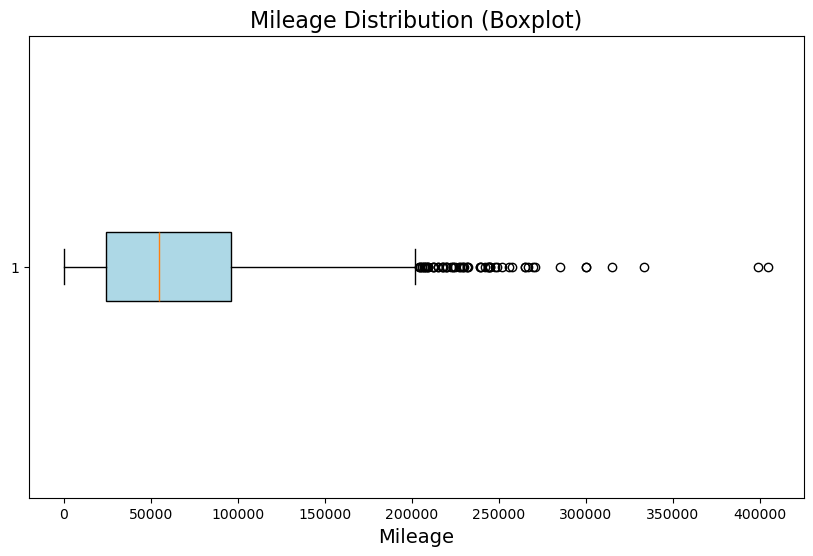

In [43]:
import matplotlib.pyplot as plt

# Create a boxplot for mileage
plt.figure(figsize=(10, 6))
plt.boxplot(used_cars_final['milage'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Mileage Distribution (Boxplot)', fontsize=16)
plt.xlabel('Mileage', fontsize=14)
plt.show()

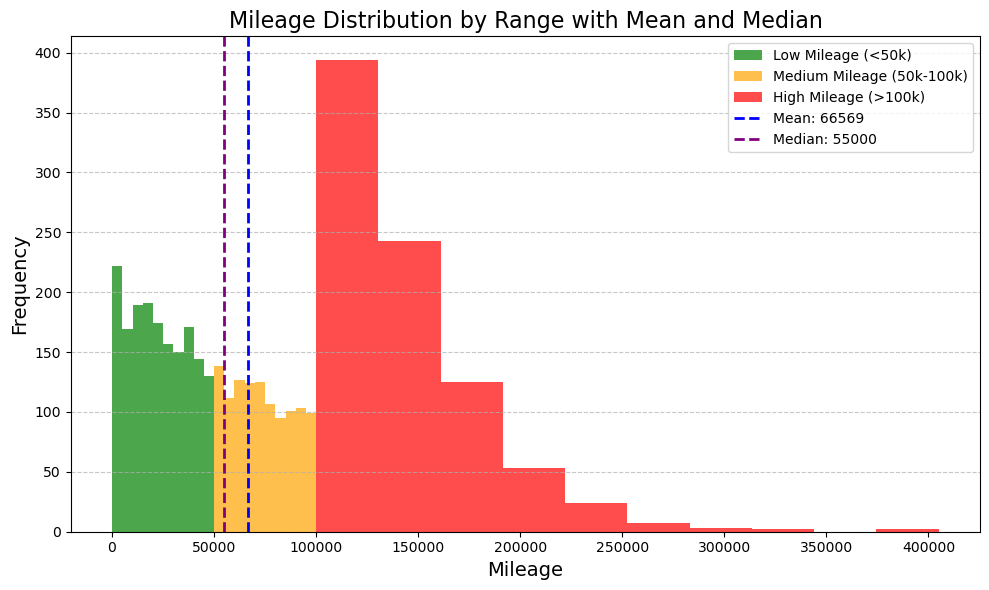

In [62]:
# Calculate mean and median
mean_mileage = used_cars_final['milage'].mean()
median_mileage = used_cars_final['milage'].median()

# Plot histogram with highlighted ranges and mean/median
plt.figure(figsize=(10, 6))
plt.hist(low_mileage['milage'], bins=10, color='green', alpha=0.7, label='Low Mileage (<50k)')
plt.hist(medium_mileage['milage'], bins=10, color='orange', alpha=0.7, label='Medium Mileage (50k-100k)')
plt.hist(high_mileage['milage'], bins=10, color='red', alpha=0.7, label='High Mileage (>100k)')

# Add mean and median lines
plt.axvline(mean_mileage, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean_mileage:.0f}')
plt.axvline(median_mileage, color='purple', linestyle='--', linewidth=2, label=f'Median: {median_mileage:.0f}')

# Add title, labels, and legend
plt.title('Mileage Distribution by Range with Mean and Median', fontsize=16)
plt.xlabel('Mileage', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

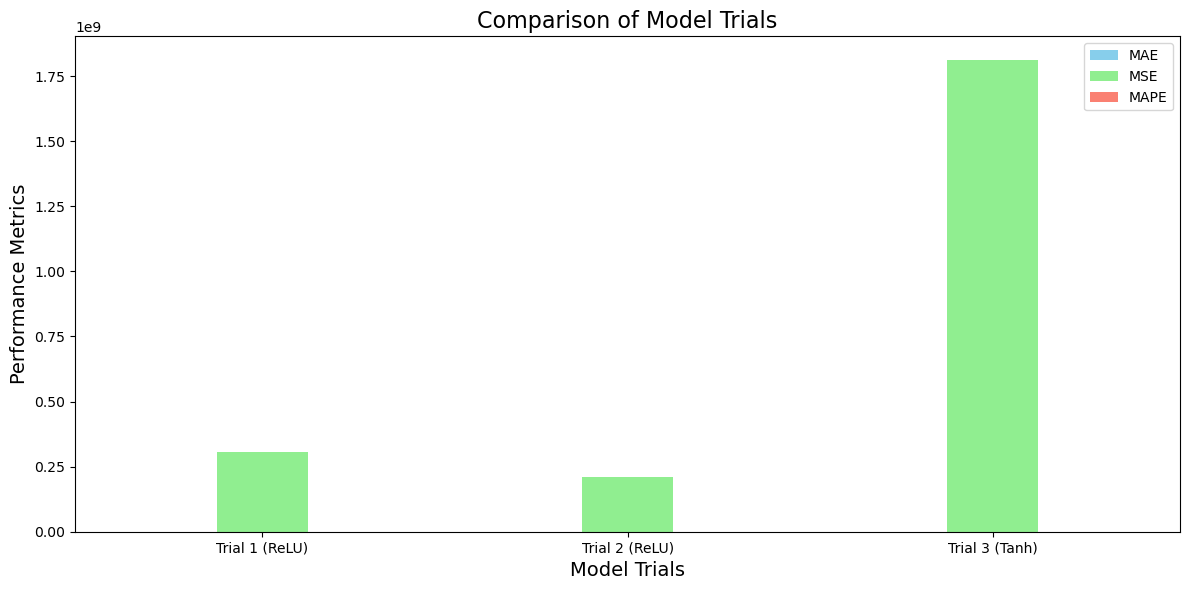

MSE values are significantly larger than the MAE 
and MAPE values, causing the green bars (MSE) to dominate the graph. 
This makes the other bars (MAE and MAPE) appear negligible in comparison
You can find the table for the values below


In [58]:
import numpy as np

# Performance metrics for each trial
models = ['Trial 1 (ReLU)', 'Trial 2 (ReLU)', 'Trial 3 (Tanh)']
mae_values = [11124.348602989474, 9494.31207258294, 34441.47863130543]  # Actual MAE values
mse_values = [304353754.7780576, 208624944.6093422, 1811847427.0964417]  # Actual MSE values
mape_values = [38.86714010807137, 31.605175739019835, 98.72676699619805]  # Actual MAPE values

# Bar width
bar_width = 0.25
x = np.arange(len(models))

# Plotting the metrics
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width, mae_values, width=bar_width, label='MAE', color='skyblue')
plt.bar(x, mse_values, width=bar_width, label='MSE', color='lightgreen')
plt.bar(x + bar_width, mape_values, width=bar_width, label='MAPE', color='salmon')

# Adding labels and title
plt.title('Comparison of Model Trials', fontsize=16)
plt.xlabel('Model Trials', fontsize=14)
plt.ylabel('Performance Metrics', fontsize=14)
plt.xticks(x, models)
plt.legend()
plt.tight_layout()
plt.show()


print("MSE values are significantly larger than the MAE ")
print("and MAPE values, causing the green bars (MSE) to dominate the graph. ") 
print("This makes the other bars (MAE and MAPE) appear negligible in comparison")
print("You can find the table for the values below")

In [57]:
# Performance metrics for each trial
models = ['Trial 1 (ReLU)', 'Trial 2 (ReLU)', 'Trial 3 (Tanh)']
mae_values = [11124.348602989474, 9494.31207258294, 34441.47863130543]  # Actual MAE values
mse_values = [304353754.7780576, 208624944.6093422, 1811847427.0964417]  # Actual MSE values
mape_values = [38.86714010807137, 31.605175739019835, 98.72676699619805]  # Actual MAPE values

# Create a DataFrame
metrics_table = pd.DataFrame({
    'Model': models,
    'MAE (in $)': mae_values,
    'MSE': mse_values,
    'MAPE (%)': mape_values
})

# Display the table
print("Comparison of Model Trials:")
print(metrics_table)

Comparison of Model Trials:
            Model    MAE (in $)           MSE   MAPE (%)
0  Trial 1 (ReLU)  11124.348603  3.043538e+08  38.867140
1  Trial 2 (ReLU)   9494.312073  2.086249e+08  31.605176
2  Trial 3 (Tanh)  34441.478631  1.811847e+09  98.726767


In [51]:
# Define metrics for comparison
metrics = {
    "Model": ["Poisson Regressor", "Trial 2 ANN"],
    "MAE (in $)": [9959.45, 9494.31],
    "MSE": [209756232.82, 208624944.61],
    "MAPE (%)": [36.80, 31.61]
}

# Create a DataFrame for better visualization
import pandas as pd
comparison_df = pd.DataFrame(metrics)

# Display the comparison
print("Comparison of Best Trial and Baseline Model:")
print(comparison_df)

Comparison of Best Trial and Baseline Model:
               Model  MAE (in $)           MSE  MAPE (%)
0  Poisson Regressor     9959.45  2.097562e+08     36.80
1        Trial 2 ANN     9494.31  2.086249e+08     31.61
